<a href="https://colab.research.google.com/github/CYBORG670/DenmarkR-VARS-VECM-/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit = pd.read_excel("/content/drive/MyDrive/ML/Credit_card.xlsx")
credit_label = pd.read_excel("/content/drive/MyDrive/ML/Credit_card_label.xlsx")
df = pd.merge(credit,credit_label,on='Ind_ID',how='inner')

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
df.rename(columns={'GENDER':'Gender','Propert_Owner':'Property_owner','CHILDREN':'Children',
                   'Type_Income':'Income_type','EDUCATION':'Education','EMAIL_ID':'Email_ID',
                   'Type_Occupation':'Occupation_type'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Income_type      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Occupation_type  1060 non-null   object 
 17  Family_Members

In [ ]:
df.isnull().sum()

Ind_ID               0
Gender               7
Car_Owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Occupation_type    488
Family_Members       0
label                0
dtype: int64

Missing values in the below features:

Gender
Annual_income
Occupation_type
Birthday_count
Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

In [ ]:
# Creating new column by dividing the birthday_count with 365, by which we get age in years

df['Age_in_years'] = np.abs((df['Birthday_count'])/365)

df['Age_in_years'].sample(5)

101     54.827397
62      45.509589
1295    40.917808
608     55.328767
578     58.978082
Name: Age_in_years, dtype: float64

In [ ]:
# Checking if there are any employed_days > 0

df[df['Employed_days']>0].shape

(261, 20)

There are 261 records which have employed days in positive (so there are not working)
Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

In [ ]:
# Crearting new column which gives experience in years by dividing employed_days with 365

df['Experience_years']= np.abs(df['Employed_days'])/365

df['Experience_years'].sample(5)

164    3.101370
169    1.375342
21     4.586301
580    9.101370
590    3.764384
Name: Experience_years, dtype: float64

# Explorartory Data Analysis (EDA)

In [ ]:
sns.set_style('dark')

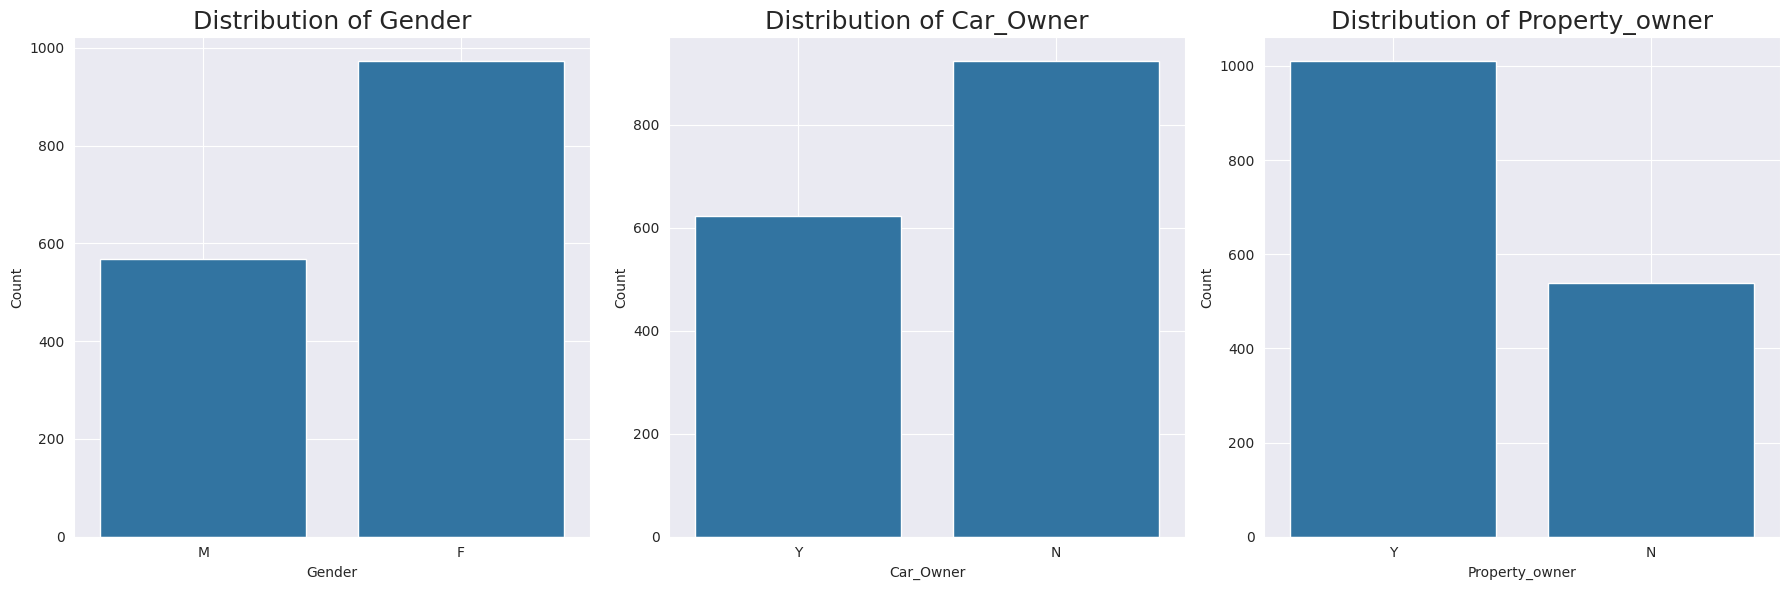

In [ ]:
cols = ['Gender', 'Car_Owner', 'Property_owner']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

The dataset displays a higher representation of females, suggesting that either more females are applying for credit cards.
A notable majority of individuals in the dataset do not own a car, which could be attributed to mutiple factors like personal choices etc.
Most individuals in the dataset are property owners, indicating that property ownership, might be a significant factor in credit card approval decisions.

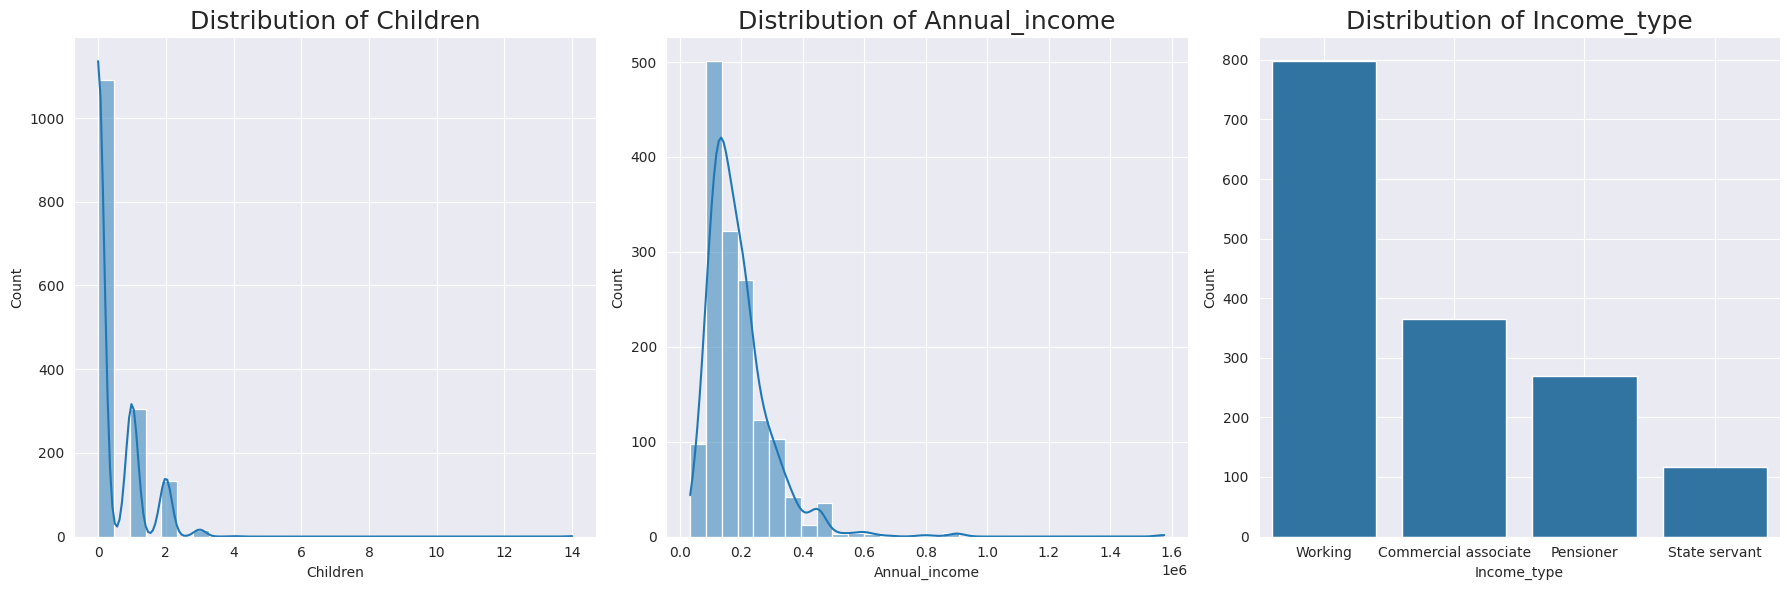

In [ ]:
cols = ['Children', 'Annual_income', 'Income_type']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True)
    else:
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)


plt.tight_layout()
plt.show()

Most individuals in the dataset either have no children or just one, with a decreasing number of individuals having two or more children.
The annual income distribution is predominantly right-skewed, suggesting that most individuals have a lower to medium income, with a few outliers in the higher income bracket.
Regarding income type, "Working" is the predominant category, succeeded by "Commercial associate" and "Pensioner", while categories like "State servant" have fewer representatives.

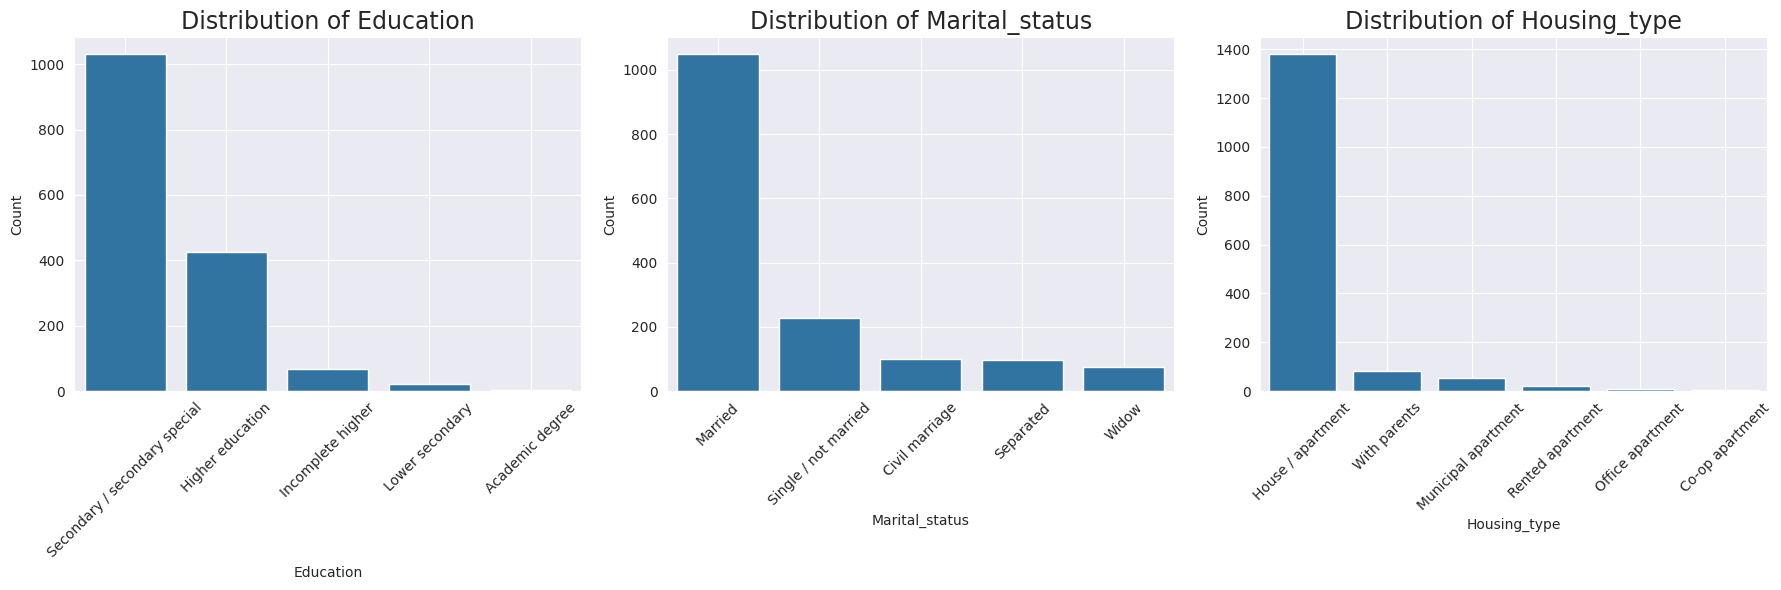

In [ ]:
cols = ['Education', 'Marital_status', 'Housing_type']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation = 45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In terms of education, the dataset predominantly consists of individuals with a "Secondary / secondary special" education level, akin to high school. While a significant number have "Higher education", fewer individuals fall into categories like "Incomplete higher" and "Lower secondary", and only a small fraction possess an "Academic degree" signifying advanced academic qualifications.
When observing marital status, most individuals are "Married", with other statuses such as "Single / not married", "Civil marriage", "Separated", and "Widow" appearing in descending order of frequency.
As for housing, the majority reside in a "House / apartment", with other housing arrangements like "With parents", "Municipal apartment", and "Rented apartment" being less frequent. The dataset contains very few individuals living in "Office apartment" or "Co-op apartment"

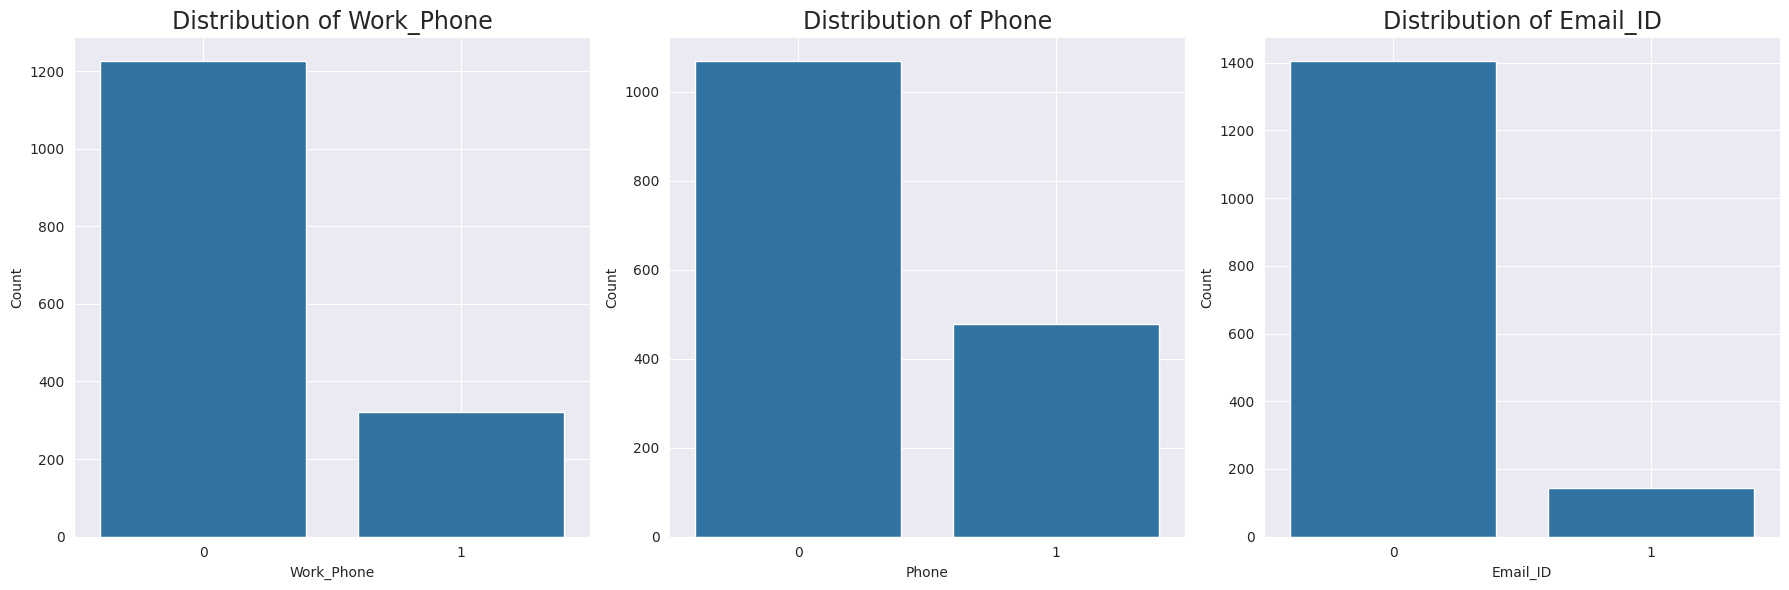

In [ ]:
cols = ['Work_Phone', 'Phone', 'Email_ID']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

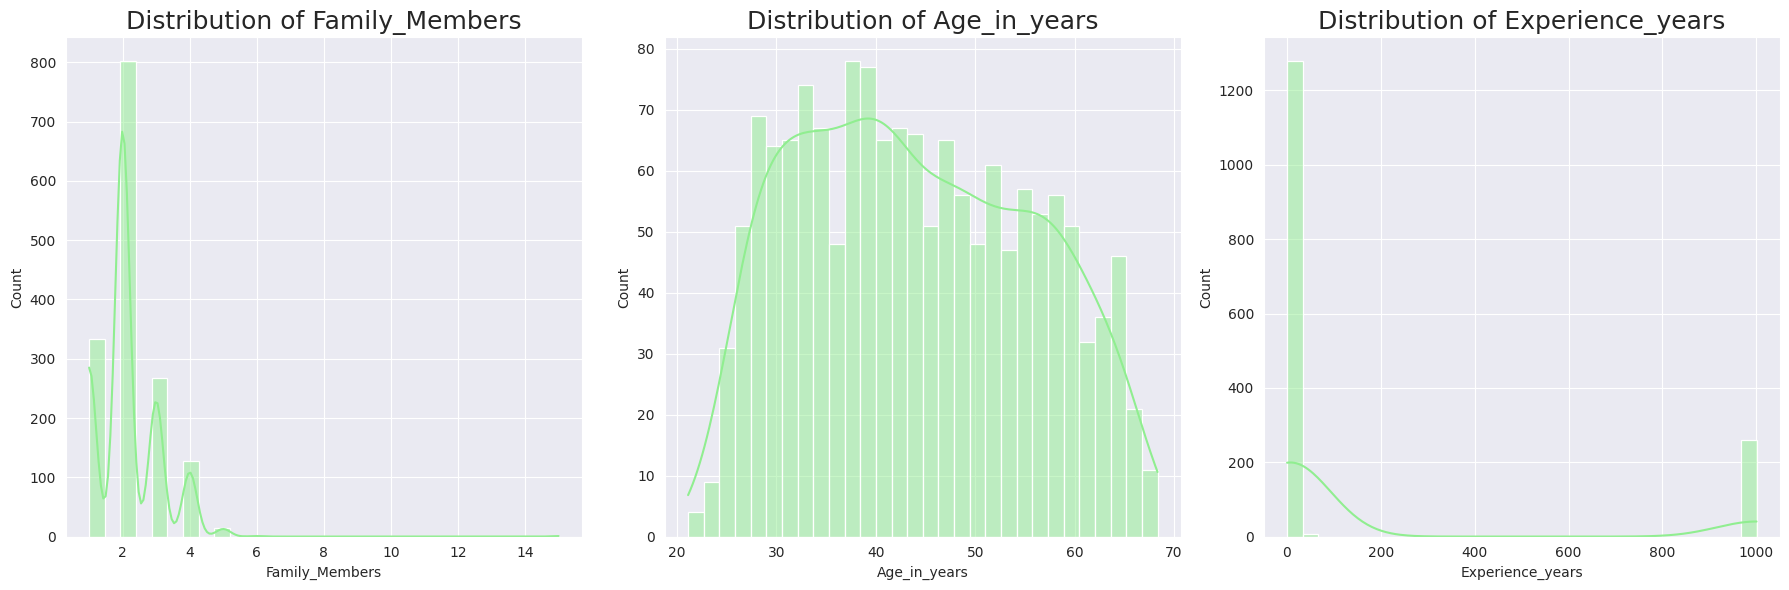

In [ ]:
cols = ['Family_Members', 'Age_in_years', 'Experience_years']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True , color ='lightgreen')
    else:
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index , color ='green')

    axes[i].set_title(f'Distribution of {col}', fontsize = 18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()

plt.show()

Annual Income

The Annual_income feature has some outliers and
It is right skewed

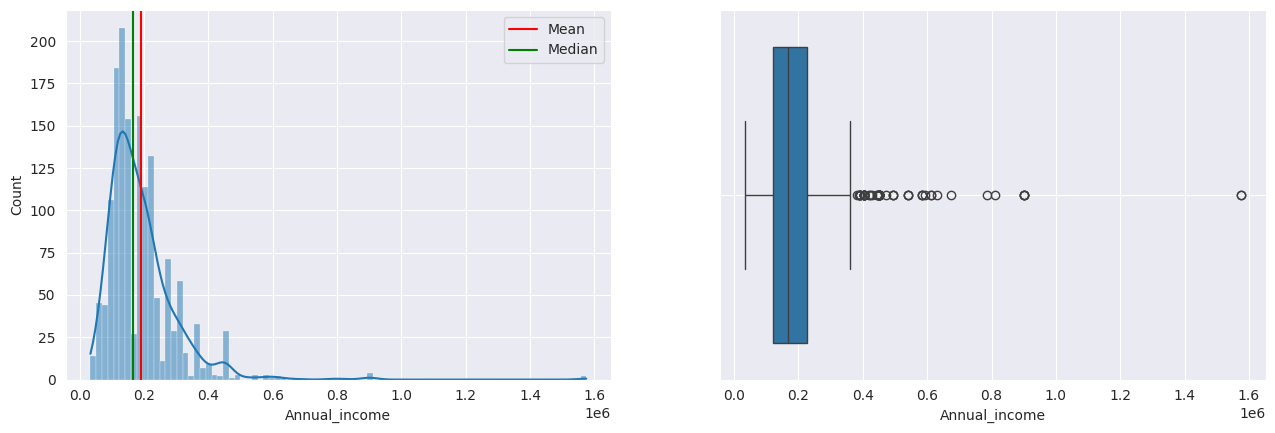

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

Experience_years

The feature Experience_years is right skewed and has some outliers.

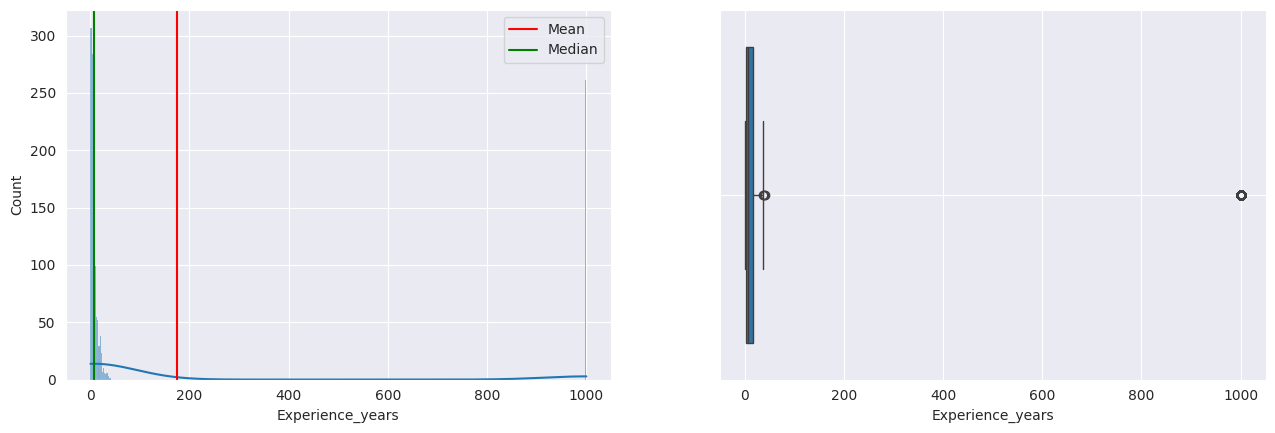

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

Label

0 is application approved and 1 is application rejected.
This clearly shows that this isimbalanced dataset as there is a huge difference between approved (0) and rejected (1) applications

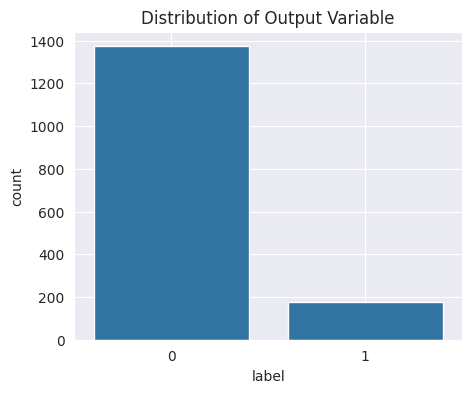

In [ ]:
plt.figure(figsize =(5,4))
sns.countplot(data=df, x='label')
plt.title("Distribution of Output Variable")
plt.grid()
plt.show()

Anual Income Vs remaning features

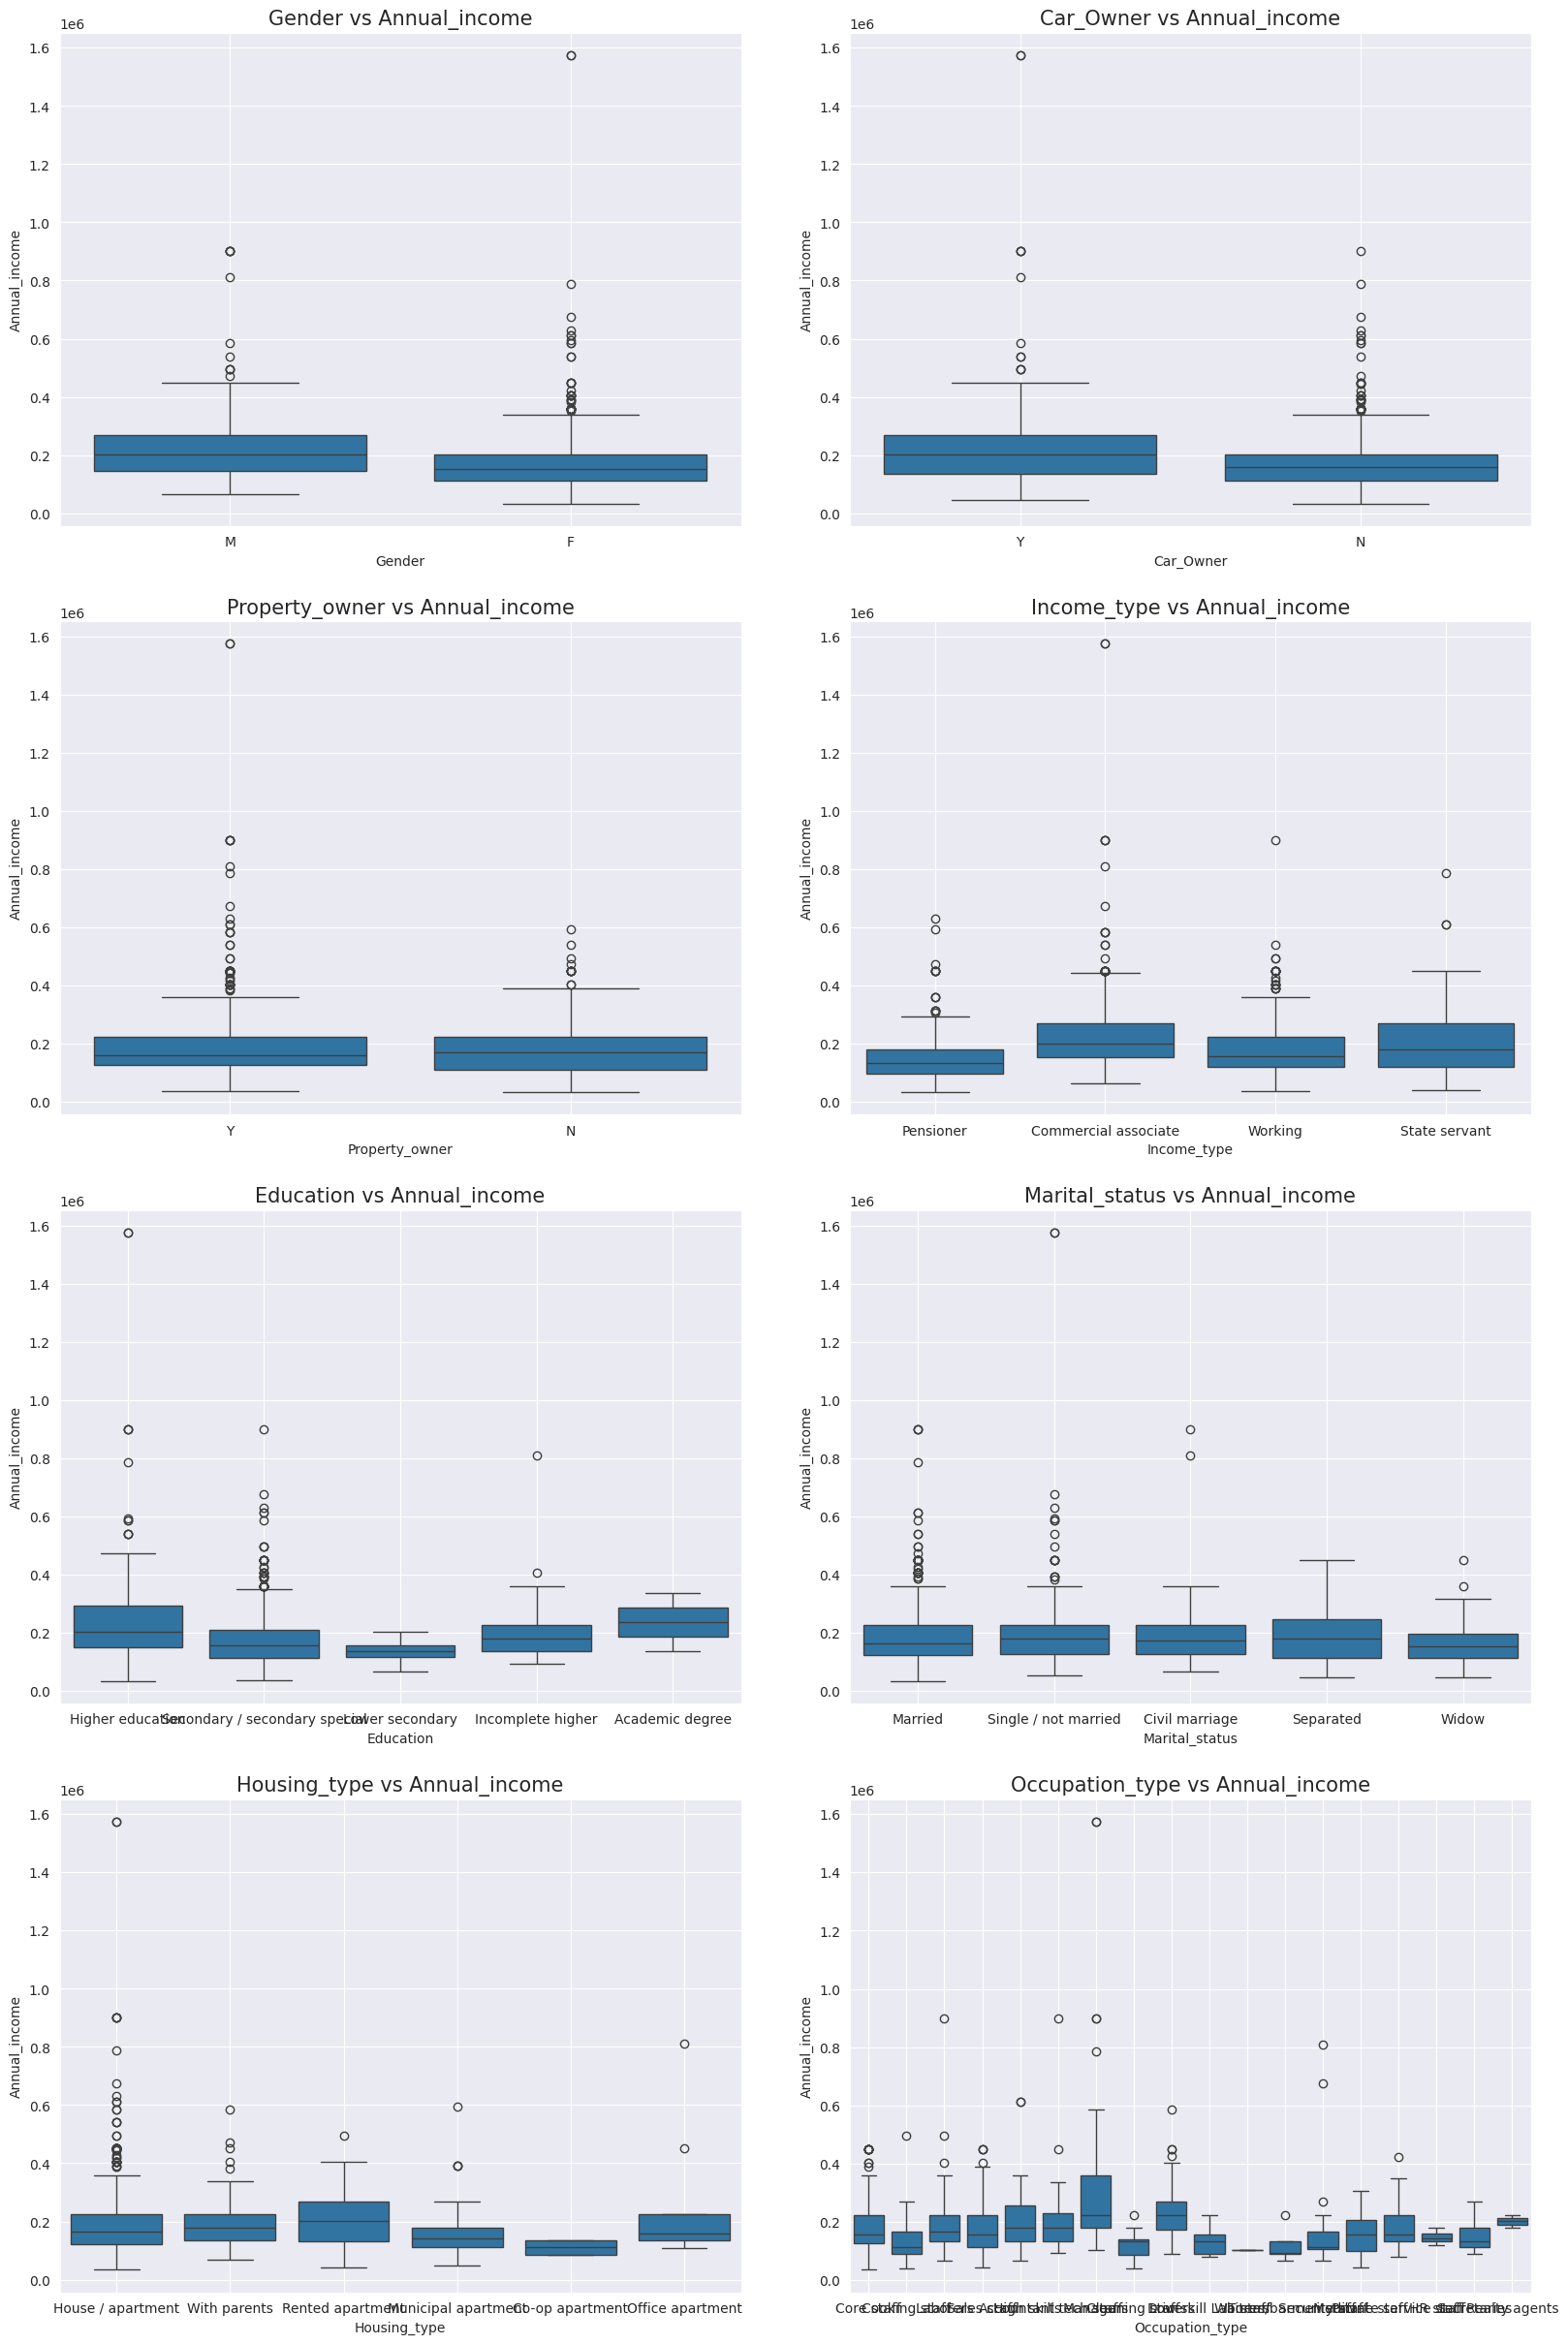

In [ ]:
cols = ['Gender', 'Car_Owner', 'Property_owner', 'Income_type', 'Education', 'Marital_status', 'Housing_type', 'Occupation_type']


fig, axes = plt.subplots(4, 2, figsize=(17, 25))
fig.tight_layout(pad=5)

# Loop through each categorical feature and create a boxplot
for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Annual_income', ax=ax)
        ax.set_title(cols[i] + ' vs Annual_income', fontsize = 15)
        ax.tick_params(axis='x')
        ax.grid(True)

plt.show()

Despite a higher number of female applicants, males generally have a greater income.
Higher-income applicants are more likely to own cars. The ownership of property doesn't significantly influence the average income.
Those with an academic degree tend to have the highest annual incomes.
Additionally, managers and drivers earn more compared to other occupations.
Applicants with a higher annual income often reside in rented apartments, irrespective of their marital status.

# Experience vs remaning features

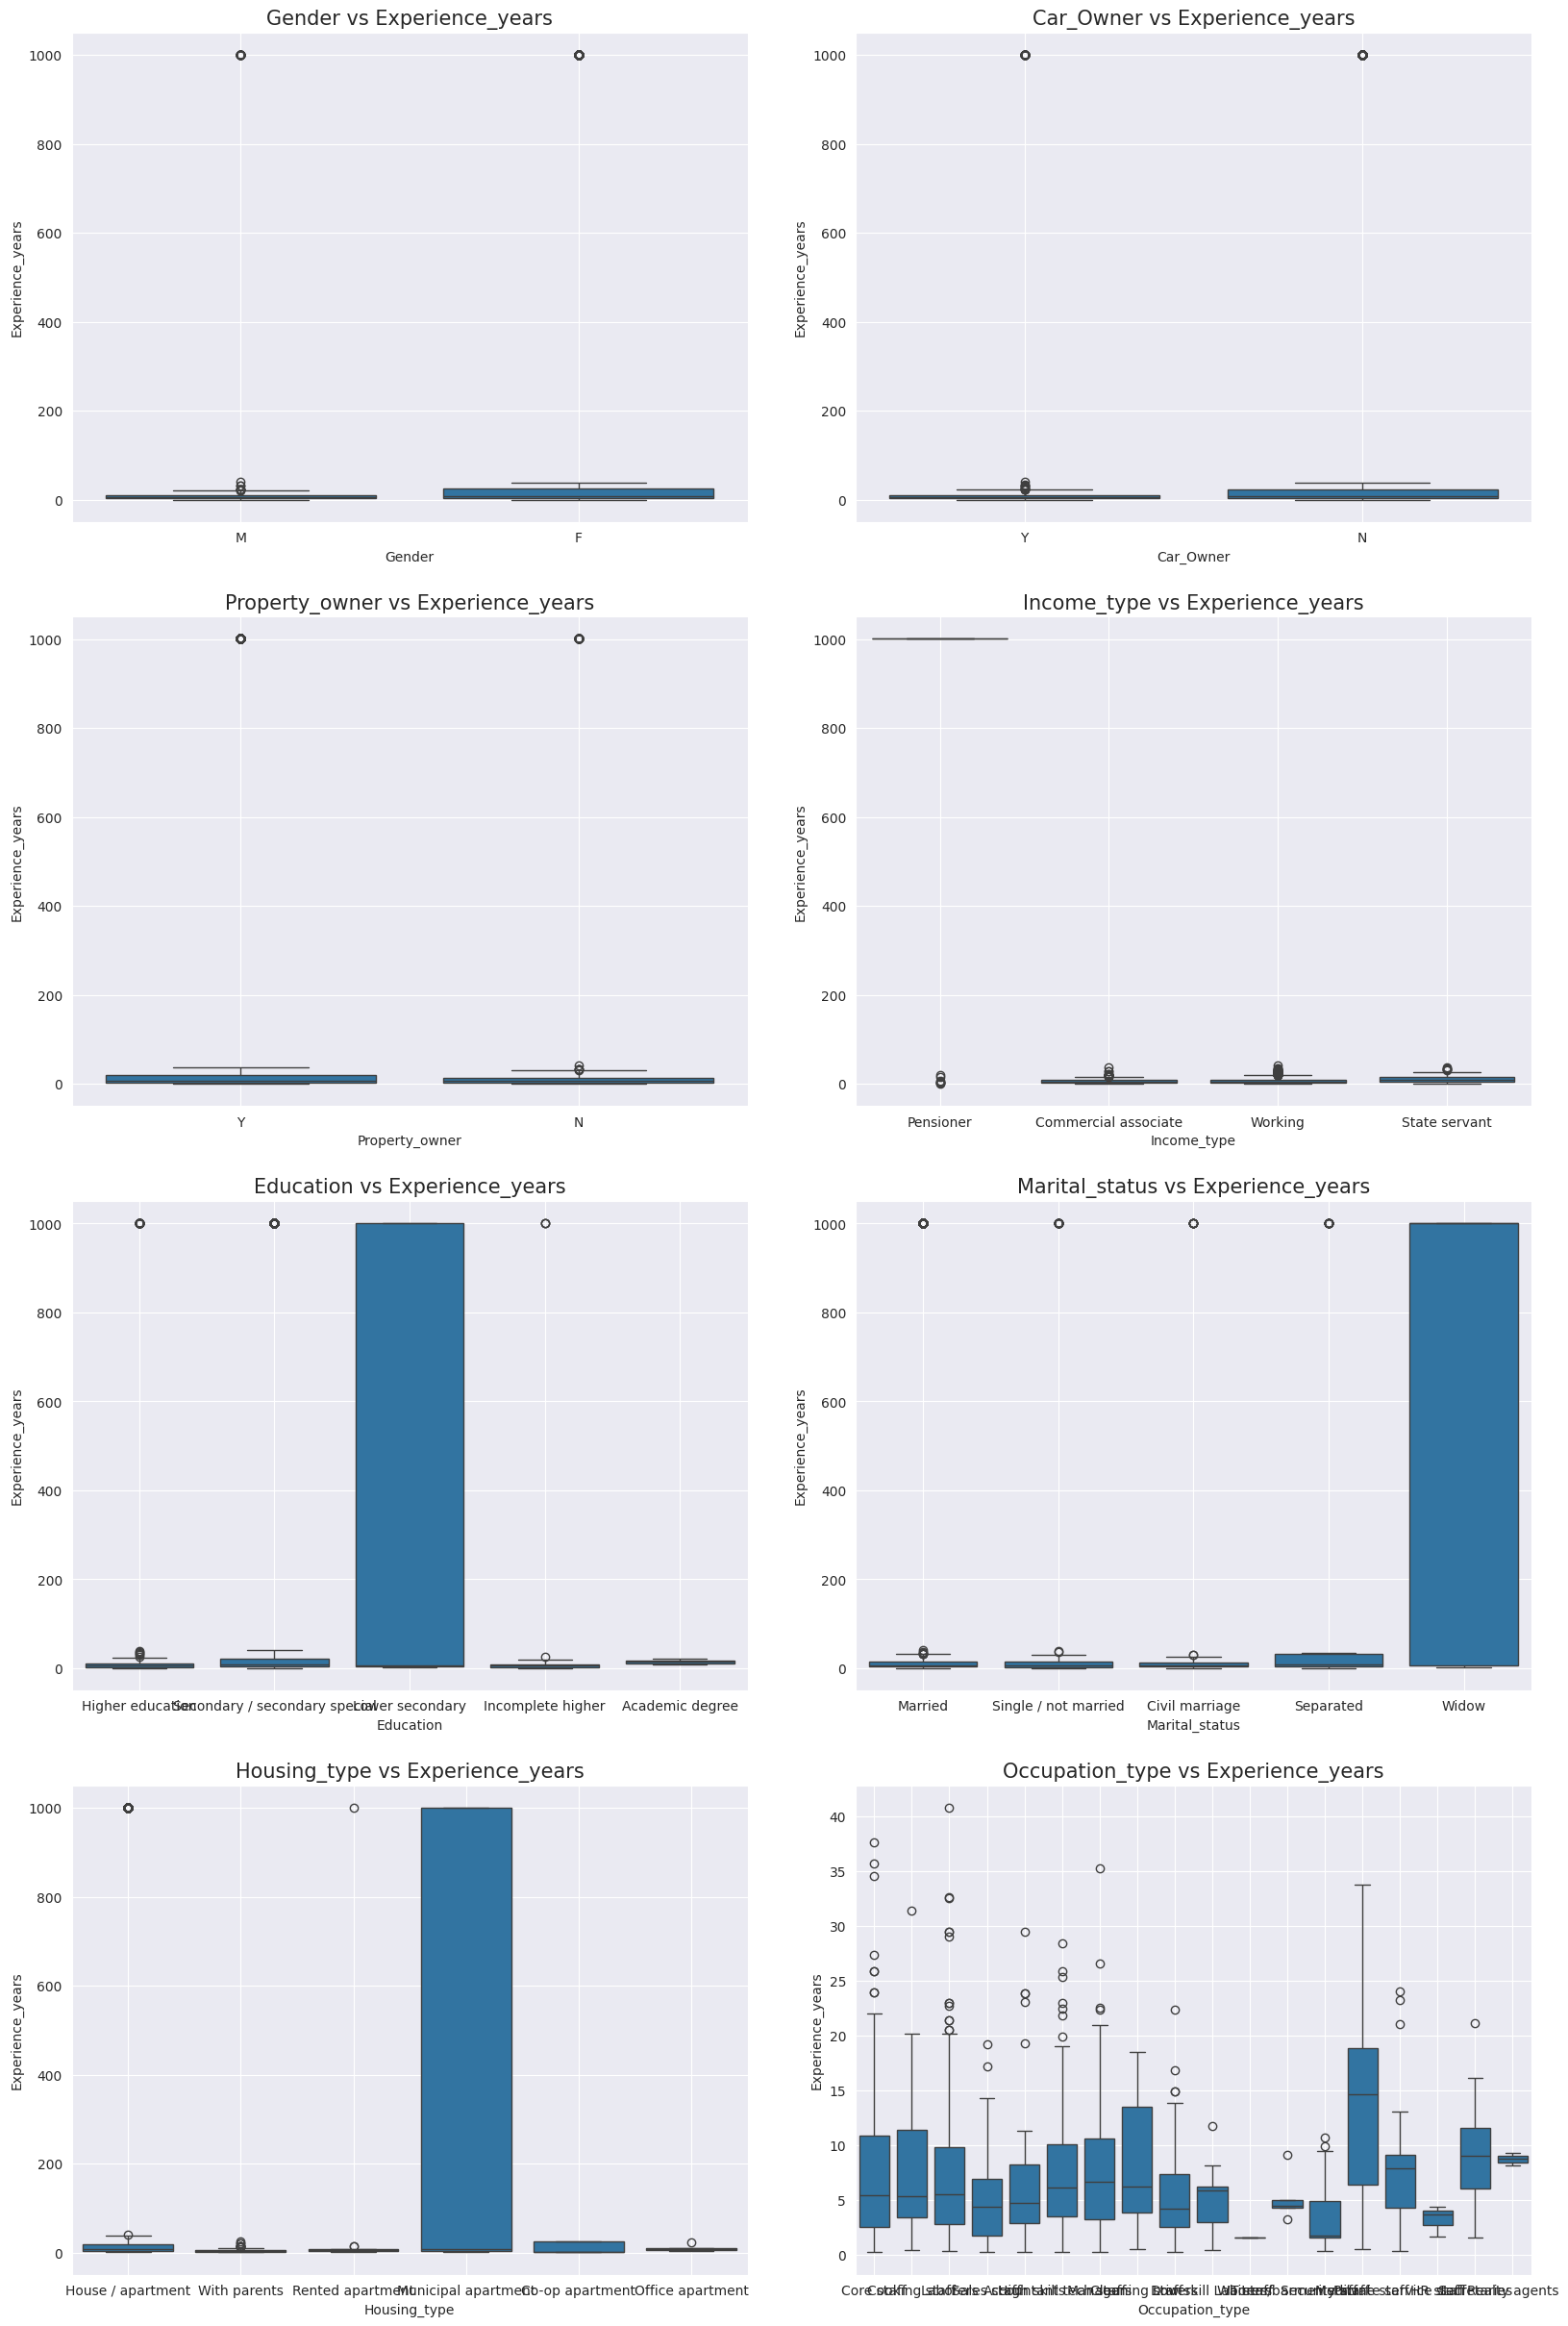

In [ ]:
cols = ['Gender', 'Car_Owner', 'Property_owner', 'Income_type', 'Education', 'Marital_status', 'Housing_type', 'Occupation_type']


fig, axes = plt.subplots(4, 2, figsize=(17, 25))
fig.tight_layout(pad=5)

# Loop through each categorical feature and create a boxplot
for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Experience_years', ax=ax)
        ax.set_title(cols[i] + ' vs Experience_years', fontsize = 15)
        ax.tick_params(axis='x')
        ax.grid(True)

plt.show()

Both male and female applicants have comparable levels of experience.
State servants and medicine staff tend to have the most experience among professions.
Those with an academic degree usually possess more work experience.

In [ ]:
features=['Annual_income','Children','Family_Members','Age_in_years', 'Experience_years']

df[features].corr()

,Annual_income,Children,Family_Members,Age_in_years,Experience_years
Annual_income,1.000000,0.078497,0.050957,-0.111638,-0.160761
Children,0.078497,1.000000,0.890248,-0.279716,-0.219686
Family_Members,0.050957,0.890248,1.000000,-0.266527,-0.238907
Age_in_years,-0.111638,-0.279716,-0.266527,1.000000,0.627239
Experience_years,-0.160761,-0.219686,-0.238907,0.627239,1.000000


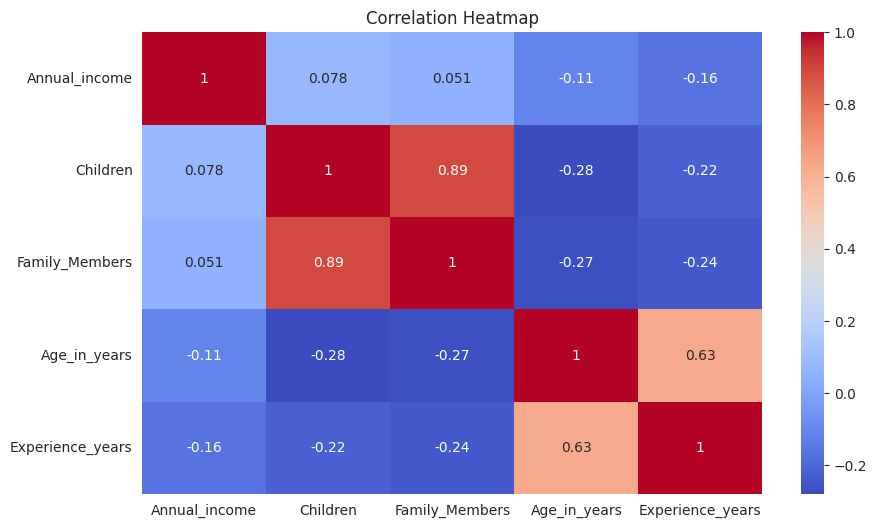

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df[features].corr(), annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Children and Family members have linear corelation, that means more no of children results in more members in the family,so one of these features should be dropped
Age and experience also show some corelation

# Missing Values Imputations

In [ ]:
df.isnull().sum()

Ind_ID                0
Gender                7
Car_Owner             0
Property_owner        0
Children              0
Annual_income        23
Income_type           0
Education             0
Marital_status        0
Housing_type          0
Birthday_count       22
Employed_days         0
Mobile_phone          0
Work_Phone            0
Phone                 0
Email_ID              0
Occupation_type     488
Family_Members        0
label                 0
Age_in_years         22
Experience_years      0
dtype: int64

In [ ]:
df["Gender"].isnull().sum()

7

In [ ]:
df["Gender"].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
df["Gender"].value_counts()

Gender
F    980
M    568
Name: count, dtype: int64

# 2) Handling missing values of Annual_income

In [ ]:
df["Annual_income"].isnull().sum()

23

In [ ]:
mean_inc_byincome_type = df.groupby(['Income_type'])['Annual_income'].mean()

mean_inc_byincome_type

Income_type
Commercial associate    234600.000000
Pensioner               155175.096226
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

In [ ]:
for income_type, mean_inc in mean_inc_byincome_type.items():
    df.loc[(df['Income_type'] == income_type) & (df['Annual_income'].isna()), 'Annual_income'] = mean_inc

In [ ]:
df["Annual_income"].isnull().sum()

0

# 3) Handling missing values of Annual_income

In [ ]:
df["Age_in_years"].isnull().sum()

22

In [ ]:
mean_income_type = df.groupby(['Income_type'])['Age_in_years'].mean()

mean_income_type

Income_type
Commercial associate    40.219428
Pensioner               59.439648
State servant           41.490269
Working                 40.789276
Name: Age_in_years, dtype: float64

In [ ]:
for income_type, mean_age in mean_income_type.items():
    df.loc[(df['Income_type'] == income_type) & (df['Age_in_years'].isna()), 'Age_in_years'] = mean_age

In [ ]:
df["Age_in_years"].isnull().sum()

0

# 4) Handling missing values of Occupation_type

Dropping this column as multiple values are missing

In [ ]:
df.head()

,Ind_ID,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age_in_years,Experience_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,51.430137,1000.665753
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,40.219428,1.605479
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,1.605479


In [ ]:
df['Occupation_type'].isnull().sum()

488

In [ ]:
df['Occupation_type'].value_counts()

Occupation_type
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [ ]:
df.drop(columns = ['Occupation_type'] , inplace = True)

In [ ]:
df.head()

,Ind_ID,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1,51.430137,1000.665753
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,2,1,40.219428,1.605479
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.605479


In [ ]:
df.shape

(1548, 20)

# Outlier Treatment

In [ ]:
df.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Property_owner', 'Children',
       'Annual_income', 'Income_type', 'Education', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'Email_ID', 'Family_Members', 'label',
       'Age_in_years', 'Experience_years'],
      dtype='object')

1) Annual_income Column

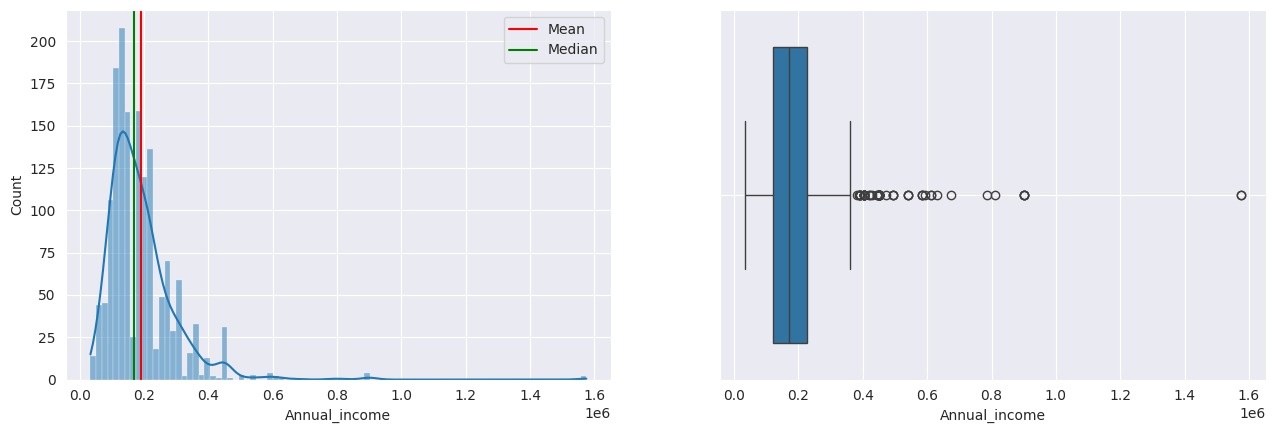

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

Using IQR method to handle the outliers

In [ ]:
Q1 = np.percentile(df['Annual_income'],25)
Q3 = np.percentile(df['Annual_income'],75)

IQR=Q3-Q1

In [ ]:
upper_limit = Q3+1.5*IQR

upper_limit

380250.0

In [ ]:
df = df[df['Annual_income'] < upper_limit]

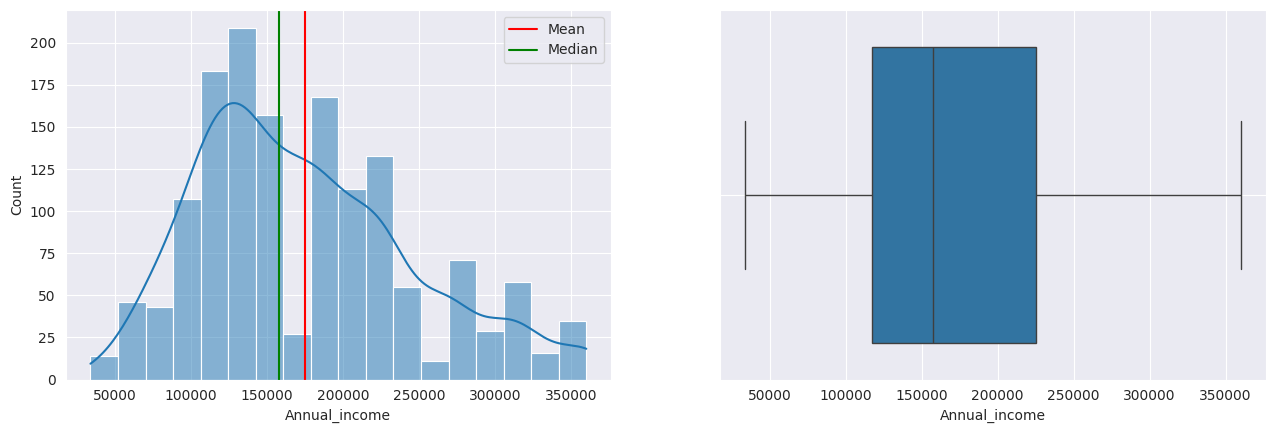

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

# 2) Experience_years Column

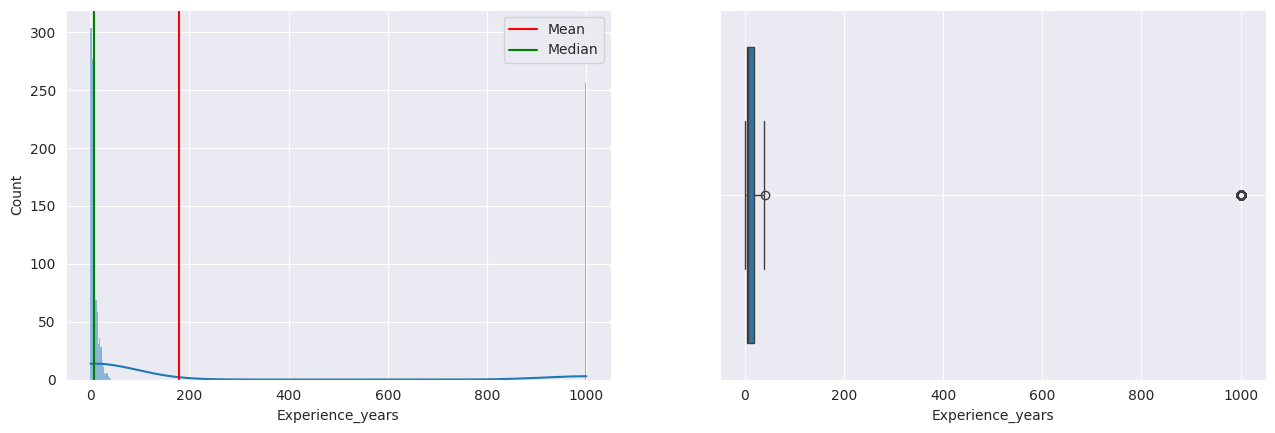

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()


In [ ]:
# using IQR method to handle the outliers

Q1 = np.percentile(df['Experience_years'], 25 , interpolation='midpoint')
Q3 = np.percentile(df['Experience_years'], 75 ,interpolation='midpoint')

IQR = Q3-Q1

In [ ]:
# checking for upper limit value

upper_limit = Q3+1.5*IQR

upper_limit

38.64520547945206

In [ ]:
# applying upperlimit value

df = df[df['Experience_years'] < upper_limit]

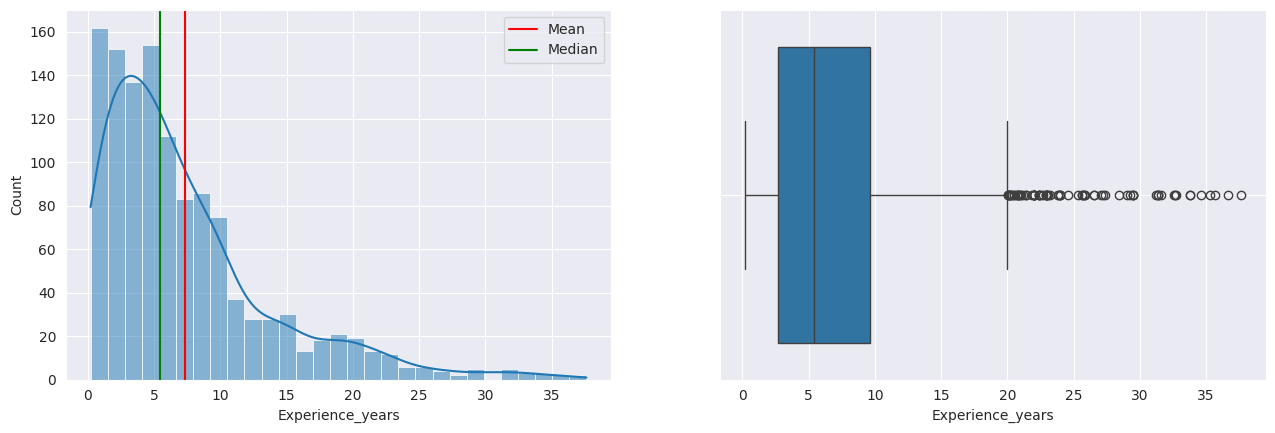

In [ ]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

Using Square root method to stabilize variance, making the data more normally distributed

In [ ]:
df['Experience_years'] = np.sqrt(df['Experience_years'])

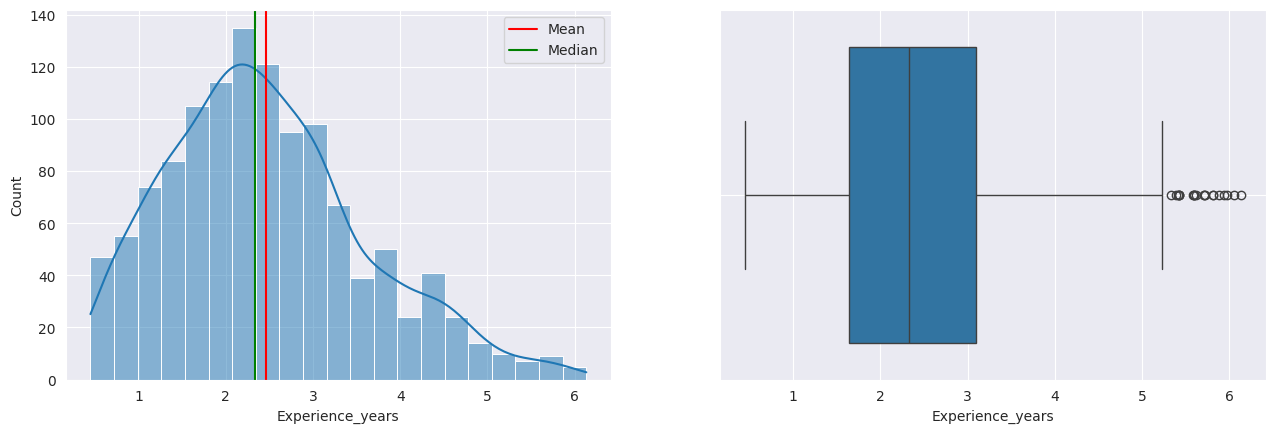

In [ ]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=df, x='Experience_years',kde=True)
plt.axvline(x=df['Experience_years'].mean(),color="red",label="Mean")
plt.axvline(x=df['Experience_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Experience_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

# 3) Family_members Column

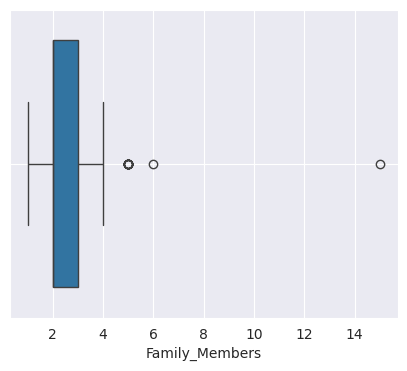

In [ ]:
plt.figure(figsize =(5,4))

sns.boxplot(data=df , x='Family_Members')

plt.grid()
plt.show()

In [ ]:
# removing the exterme value

df = df[df['Family_Members'] < 14]

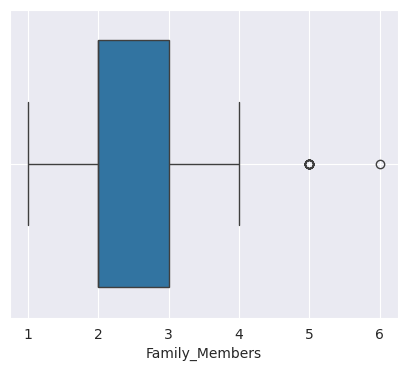

In [ ]:
plt.figure(figsize =(5,4))

sns.boxplot(data=df , x='Family_Members')

plt.grid()
plt.show()

In [ ]:
# finally checking the shape

df.shape

(1217, 20)

In [ ]:
df.head()

,Ind_ID,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.267075
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,2,1,40.219428,1.267075
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.267075
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.267075
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1,37.142466,1.267075


In [ ]:
# Expoting to CSV file

df.to_csv('cleaned_data.csv')

Dropping the columns

Children : Children and family_members are corelated to each other, so dropping.

Mobile_phone : No variation in data, contains single category value only.

In [ ]:
df = df.drop(columns=['Children','Mobile_phone'])

In [ ]:
df.shape

(1217, 18)

Feature Transformation

1) Binary Encoding

In [ ]:
# for gender column
df['Gender'] = df['Gender'].map({'M':1,'F':0})

# for Car_Owner column
df['Car_Owner'] = df['Car_Owner'].map({'Y':1,'N':0})

# for Property_owner column
df['Property_owner'] = df['Property_owner'].map({'Y':1,'N':0})

In [ ]:
df.sample(5)

,Ind_ID,Gender,Car_Owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
905,5025791,0,0,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-18506.0,-3630,0,0,0,2,0,50.701370,3.153602
395,5023059,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-11279.0,-508,0,0,0,3,0,30.901370,1.179738
668,5069289,0,0,1,270000.0,Commercial associate,Incomplete higher,Married,House / apartment,-14783.0,-3397,0,0,0,2,0,40.501370,3.050713
993,5033418,1,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10756.0,-2180,0,1,0,2,0,29.468493,2.443891
997,5028909,0,0,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-9963.0,-1876,0,0,0,2,0,27.295890,2.267096


# 2) Ordinal Encoding on 'Education' Column

In [ ]:
df['Education'].value_counts()

Education
Secondary / secondary special    794
Higher education                 344
Incomplete higher                 63
Lower secondary                   14
Academic degree                    2
Name: count, dtype: int64

In [ ]:
# importing ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# values to ordinal
cols_order = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']

x = OrdinalEncoder(categories=[cols_order])

df['Education'] = x.fit_transform(df[['Education']])

In [ ]:
df.sample(5)

,Ind_ID,Gender,Car_Owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,Email_ID,Family_Members,label,Age_in_years,Experience_years
1194,5132752,1,0,1,90000.0,Working,1.0,Single / not married,House / apartment,-10569.0,-226,1,1,0,1,0,28.956164,0.786879
1409,5025936,0,0,1,130500.0,Working,1.0,Married,House / apartment,-13520.0,-5488,0,0,0,2,0,37.041096,3.877579
212,5062688,1,1,1,247500.0,State servant,1.0,Married,Municipal apartment,-20112.0,-875,1,0,1,2,0,55.101370,1.548309
1016,5126687,0,0,1,90000.0,Working,1.0,Married,House / apartment,-19899.0,-3149,1,0,0,2,0,54.517808,2.937243
1328,5089736,0,1,0,135000.0,Working,1.0,Married,House / apartment,-19010.0,-6761,1,1,0,2,0,52.082192,4.303869


3) One hot *Encodeing*

In [ ]:
# columns to onehot encoding
one_cols = df[['Income_type','Marital_status','Housing_type']]

df = pd.get_dummies(df, columns=['Income_type','Marital_status','Housing_type'],drop_first=True)  # drop_first to avoid multicolinearity

In [ ]:
df.sample(5)

,Ind_ID,Gender,Car_Owner,Property_owner,Annual_income,Education,Birthday_count,Employed_days,Work_Phone,Phone,...,Income_type_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1149,5045742,1,1,0,225000.0,3.0,-13271.0,-1569,0,0,...,False,True,False,False,False,True,False,False,False,False
948,5126809,1,0,1,157500.0,1.0,-10676.0,-2326,0,1,...,False,True,False,False,False,True,False,False,False,False
730,5146318,0,0,1,135000.0,1.0,-14760.0,-1315,0,0,...,True,False,True,False,False,True,False,False,False,False
1446,5100010,1,1,0,202500.0,1.0,NaN,-918,1,1,...,True,True,False,False,False,True,False,False,False,False
1046,5062095,1,1,0,180000.0,1.0,-10171.0,-1812,1,1,...,True,False,False,True,False,True,False,False,False,False


In [ ]:
df.shape

(1217, 27)

Dealing with Imabalance in *Dataset*

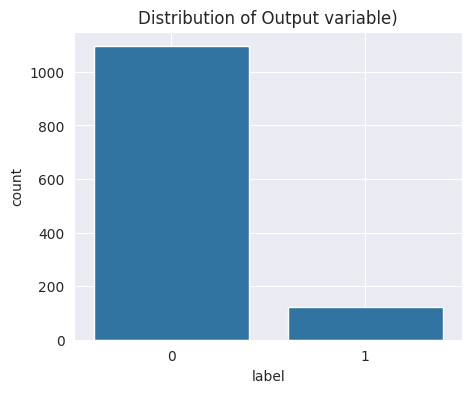

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot( data= df, x ='label')
plt.title("Distribution of Output variable)")

plt.grid()
plt.show()

In [ ]:
# checking unique values

df['label'].value_counts()

label
0    1095
1     122
Name: count, dtype: int64

Performing SMOTE to handle thsis imbalance in the data.

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Supongamos que estrategia='mean' para SimpleImputer es adecuada para tu conjunto de datos
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Ahora puedes aplicar SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_imputed, y)


In [ ]:
y.value_counts()

label
0    1095
1     122
Name: count, dtype: int64

Splitting the dataset into train and test

In [ ]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
X_train.shape

(973, 26)

In [ ]:
X_test.shape

(244, 26)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=10)
dtc = DecisionTreeClassifier(random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=10)
knn = KNeighborsClassifier()

In [ ]:
from sklearn.impute import SimpleImputer

# Supongamos que estrategia='mean' para SimpleImputer es adecuada para tu conjunto de datos
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

for name, clf in classifiers:
    clf.fit(X_train_imputed, y_train)
    y_pred = clf.predict(X_test_imputed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1, roc_auc_test]


In [ ]:
# Convert the results dictionary to a DataFrame for better visualization

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
results_df

,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,0.889344,0.000000,0.000000,0.000000,0.500000
Decision Tree,0.852459,0.378378,0.518519,0.437500,0.706264
Random Forest,0.930328,0.857143,0.444444,0.585366,0.717614
XGBoost,0.913934,0.687500,0.407407,0.511628,0.692183
Support Vector Machine,0.889344,0.000000,0.000000,0.000000,0.500000
K-Nearest Neighbors,0.881148,0.000000,0.000000,0.000000,0.495392


# Model Selection
XGBOOST

Performance and Accuracy: XGBoost consistently demonstrated superior performance in terms of accuracy, precision, and recall when compared to other models on the dataset.

Interpretability and Feature Importance: XGBoost provides clear insights into the significance of different features in making predictions.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

XGBOOST model prediction

<Figure size 600x600 with 0 Axes>

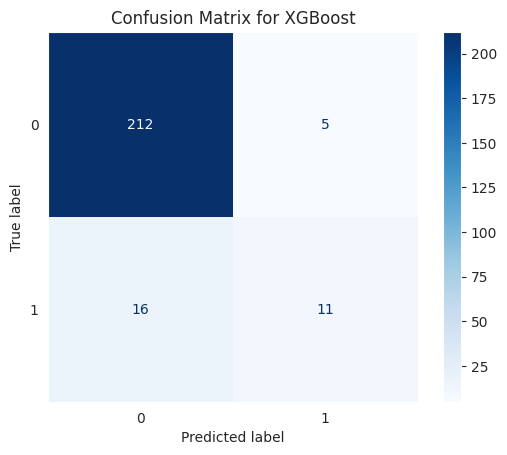



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       217
           1       0.69      0.41      0.51        27

    accuracy                           0.91       244
   macro avg       0.81      0.69      0.73       244
weighted avg       0.90      0.91      0.90       244



In [ ]:
# Predict using the trained XGBoost model
y_pred_xgb = xgb.predict(X_test_scaled)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix for XGBoost")
plt.grid(False)
plt.show()
print("\n")
# Classification Report
print("Classification Report for XGBoost:\n")

print(classification_report(y_test, y_pred_xgb))

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# the parameter grid

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# initialize GridSearchCV
clf_xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(clf_xgb, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


# Testing the Model

In [ ]:
# Initialize the XGBoost classifier with the best parameters

xgb_best = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.9,
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = xgb_best.predict(X_test_scaled)

# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning: {precision_best}")
print(f"Recall after Hyperparameter Tuning: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best}")

# Feature Importance

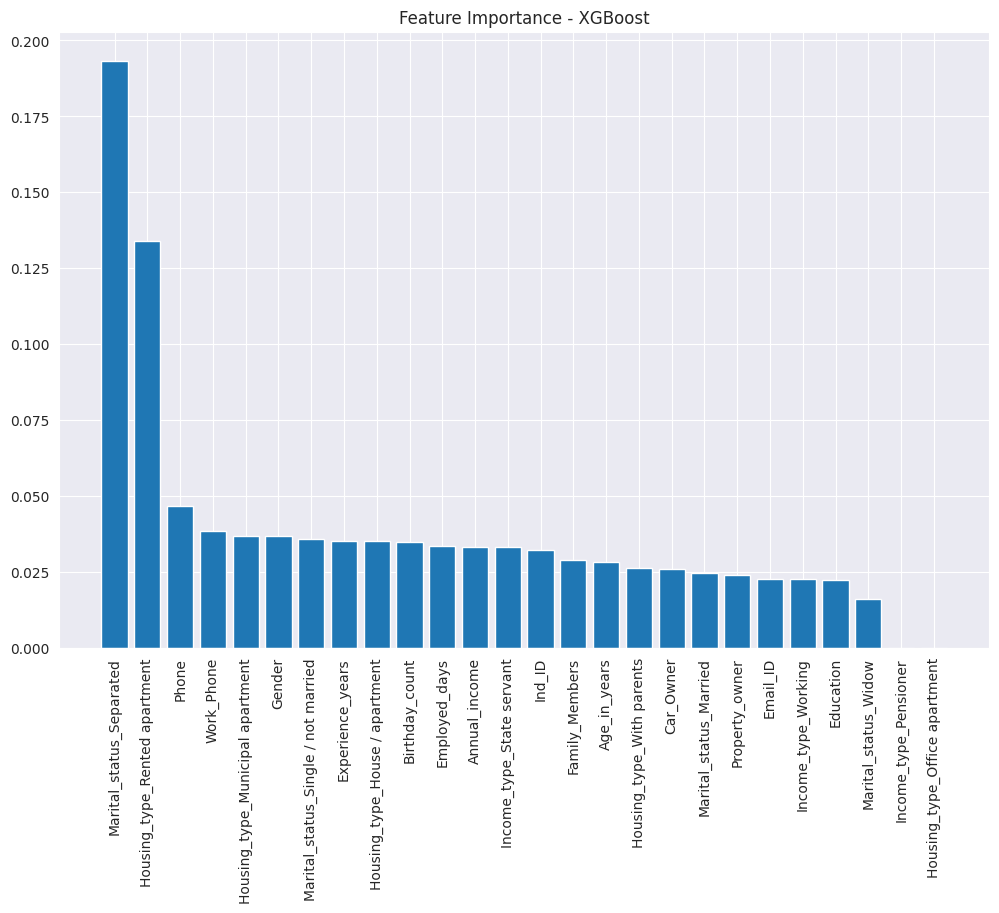

In [ ]:
feature_importances = xgb.feature_importances_

# Sort the feature importances in descending order and get the indices

sorted_indices = np.argsort(feature_importances)[::-1]

# Ploting feature importances
plt.figure(figsize=(12, 8))

plt.title("Feature Importance - XGBoost")
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Conclusion
In this project, we embarked on the journey of building a predictive model for credit card approval. After exploring multiple algorithms, we finalized XGBoost due to its robustness and efficiency in handling tabular data with a mix of different variable types.

We utilized XGBoost, a gradient boosting algorithm, known for its high performance in classification problems

Performance Metrics: The model after hyperparameter tuning achieved an accuracy of approximately 92.93%. Notably, the precision and recall were also high, indicating 93.24% and 93.67% respectively. The F1-Score, which is the harmonic mean of precision and recall, stood at 93.45%, further cementing the model's reliability. The ROC AUC Score, which gives us the area under the curve for true positive rate vs false positive rate, was approximately 92.86%.

Through diligent preprocessing, model selection, and hyperparameter tuning, we've crafted a robust model for credit card approval predictions. This model not only boasts high accuracy but also ensures a balanced trade-off between precision and recall, thus making it a valuable asset for financial institutions aiming to streamline their credit card approval processes.